In [1]:
# Getting CIFAR-10 Dataset

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [0]:
# Split CIFAR-10 dataset into Training and Testing sets

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [0]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
#model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 4,206,602
Trainable params: 4,206,602
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 79s 2ms/step - loss: 7.2765 - acc: 0.1803 - val_loss: 1.9587 - val_acc: 0.2789
Epoch 2/20
50000/50000 [==============================] - 77s 2ms/step - loss: 1.8313 - acc: 0.3402 - val_loss: 1.8216 - val_acc: 0.3626
Epoch 3/20
50000/50000 [==============================] - 78s 2ms/step - loss: 1.7092 - acc: 0.3886 - val_loss: 1.6998 - val_acc: 0.3904
Epoch 4/20
50000/50000 [==============================] - 78s 2ms/step - loss: 1.6329 - acc: 0.4185 - val_loss: 1.6485 - val_acc: 0.4201
Epoch 5/20
50000/50000 [==============================] - 78s 2ms/step - loss: 1.5842 - acc: 0.4358 - val_loss: 1.7295 - val_acc: 0.4005
Epoch 6/20
50000/50000 [==============================] - 78s 2ms/step - loss: 1.5374 - acc: 0.4562 - val_loss: 1.5751 - val_acc: 0.4383
Epoch 7/20
50000/50000 [==============================] - 79s 2ms/step - loss: 1.4972 - acc: 0.4681 - val_loss: 1.5716 - val_acc

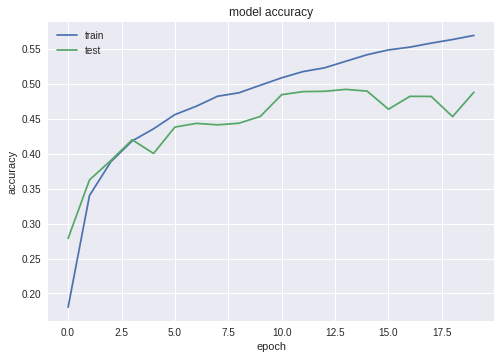

In [9]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
history2 = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 94s 2ms/step - loss: 1.3038 - acc: 0.5438 - val_loss: 1.7601 - val_acc: 0.4544
Epoch 2/20
50000/50000 [==============================] - 86s 2ms/step - loss: 1.3294 - acc: 0.5368 - val_loss: 1.8845 - val_acc: 0.4101
Epoch 3/20
50000/50000 [==============================] - 118s 2ms/step - loss: 1.3507 - acc: 0.5331 - val_loss: 1.7696 - val_acc: 0.4614
Epoch 4/20
50000/50000 [==============================] - 117s 2ms/step - loss: 1.3616 - acc: 0.5306 - val_loss: 1.7393 - val_acc: 0.4722
Epoch 5/20
50000/50000 [==============================] - 117s 2ms/step - loss: 1.3866 - acc: 0.5229 - val_loss: 2.1242 - val_acc: 0.4122
Epoch 6/20
50000/50000 [==============================] - 116s 2ms/step - loss: 1.3934 - acc: 0.5244 - val_loss: 1.9035 - val_acc: 0.4198
Epoch 7/20
50000/50000 [==============================] - 133s 3ms/step - loss: 1.4055 - acc: 0.5196 - val_loss: 1.9224 - va